# Single Copy Deletion Region

- Region: [34408800-34595200]
- Window size: 100
- Chromosome: chr2
- Sam configuration:

```
"sam_read_config":{
    "max_depth":1000,
    "ignore_orphans":false,
    "truncate":true,
    "quality_threshold":20,
    "add_indels":true
  },
```

In [1]:
import sys
sys.path.append("../")

In [2]:
from itertools import cycle, islice

In [3]:
from sklearn import mixture
from sklearn import metrics
from sklearn.cluster import KMeans

In [4]:
import numpy as np
from scipy.stats import kde
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [5]:
sns.set(color_codes=True)

In [6]:
def load_data_file(filename):

    with open(filename) as file:
        context = file.read()
        size = len(context)
        arraystr= context[1:size-1]
        arraystr = arraystr.split(',')
        region_means = [float(item) for item in arraystr]
        return region_means

In [7]:
wga_mean_file = "/home/a/ag568/wga_windows_mean_0_SINGLE_COPY_DELETION.txt"
no_wga_mean_file = "/home/a/ag568/no_wga_windows_mean_0_SINGLE_COPY_DELETION.txt"
gc_file = "/home/a/ag568/windows_gc_0_SINGLE_COPY_DELETION.txt"

In [8]:
wga_mu = load_data_file(filename=wga_mean_file)
no_wga_mu = load_data_file(filename=no_wga_mean_file)
gc = load_data_file(filename=gc_file)

In [9]:
assert len(wga_mu) == len(no_wga_mu)
assert len(gc) == len(wga_mu)

In [10]:
print("Size of WGA sample {0}".format(len(wga_mu)))
print("WGA max: {0}".format(max(wga_mu)))
print("WGA min: {0}".format(min(wga_mu)))
print("WGA mean: {0}".format(np.mean(wga_mu)))
print("WGA var: {0}".format(np.var(wga_mu)))

Size of WGA sample 1860
WGA max: 44.27
WGA min: 1.95
WGA mean: 19.848919354838714
WGA var: 66.58633275693721


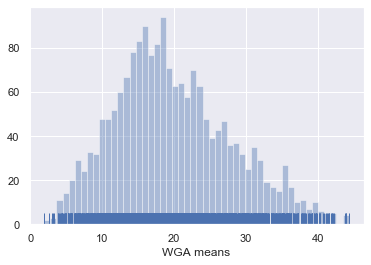

In [11]:
sns.distplot(wga_mu, bins=50, kde=False, rug=True)
plt.xlabel("WGA means")
plt.show()

In [12]:
print("NO-WGA size {0}".format(len(no_wga_mu)))
print("NO-WGA max: {0}".format(max(no_wga_mu)))
print("NO-WGA min: {0}".format(min(no_wga_mu)))
print("NO-WGA mean: {0}".format(np.mean(no_wga_mu)))
print("NO-WGA var: {0}".format(np.var(no_wga_mu)))

NO-WGA size 1860
NO-WGA max: 34.62
NO-WGA min: 1.26
NO-WGA mean: 17.111021505376343
NO-WGA var: 34.75267013932247


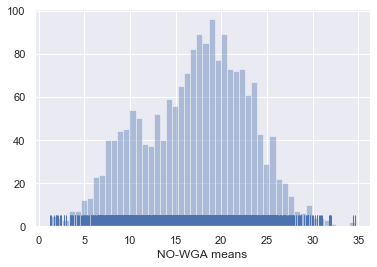

In [13]:
sns.distplot(no_wga_mu, bins=50, kde=False, rug=True)
plt.xlabel("NO-WGA means")
plt.show()

In [14]:
#nbins = 100
#min_ = 0.0
#max_ = 50.0
#density=False
#plt.hist2d(no_wga_mu, wga_mu,
#             bins=[nbins, nbins], cmap='Blues', density=density,
#             cmax=1000, cmin=0, alpha=0.99,
#             range=((min_, max_), (min_, max_)))

#kernel= kde.gaussian_kde(np.vstack([no_wga_mu, wga_mu]))
#xi, yi = np.mgrid[min_:max_:nbins*1j,
#                    min_:max_:nbins*1j]
#zi = kernel(np.vstack([xi.flatten(), yi.flatten()]))
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap='Blues') 
#plt.contour(xi, yi, zi.reshape(xi.shape) )

#plt.show()

In [15]:
X = np.stack((no_wga_mu, wga_mu), axis=0)
cov = np.cov(X)
print("Covariance matrix: \n", cov)

v, w = linalg.eigh(cov)
print(" Eigenvalues: \n", v)
print(" Eigenvectors: \n", w)

Covariance matrix: 
 [[34.77136442 17.75067534]
 [17.75067534 66.62215112]]
 Eigenvalues: 
 [26.849229   74.54428654]
 Eigenvectors: 
 [[-0.91318141  0.40755333]
 [ 0.40755333  0.91318141]]


In [16]:
ratio = []
for no_wga, wga  in zip(no_wga_mu, wga_mu):
    ratio.append((wga + 1)/(no_wga + 1))
    
ratio = np.array(ratio)
print("NaN in ratio: ", np.any(np.isnan(ratio)))
print("Max ratio: ", max(ratio))
print("Min ratio: ", min(ratio))
X = np.stack((no_wga_mu, wga_mu, ratio), axis=0)
cov = np.cov(X)
print("Covariance matrix: \n", cov)

v, w = linalg.eigh(cov)
print(" Eigenvalues: \n", v)
print(" Eigenvectors: \n", w)

NaN in ratio:  False
Max ratio:  5.296551724137931
Min ratio:  0.2872664059104737
Covariance matrix: 
 [[34.77136442 17.75067534 -1.61515591]
 [17.75067534 66.62215112  2.4679903 ]
 [-1.61515591  2.4679903   0.33508776]]
 Eigenvalues: 
 [7.10856195e-02 2.70788858e+01 7.45786319e+01]
 Eigenvectors: 
 [[ 0.07552672  0.91055178 -0.40643717]
 [-0.05706233 -0.40298667 -0.91342522]
 [ 0.99550972 -0.09218026 -0.02152194]]


In [17]:
#from mpl_toolkits import mplot3d
#fig = plt.figure(figsize=(20,10))
#ax = plt.axes(projection='3d')
#ax.scatter3D(no_wga_mu, wga_mu, ratio, c=ratio, cmap='viridis', linewidth=0.5);
#ax.set_xlabel('NO-WGA')
#ax.set_ylabel('WGA')
#ax.set_zlabel('Ratio')

In [18]:
pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
print("Pearson correlation: ", pearson)

Pearson correlation:  0.36880320695320684


In [19]:
#fig, axs = plt.subplots(1, 1)#, figsize=(9, 3))
#nbins = 100
#min_ = 0.0
#max_ = 50.0
#density=False
#plt.hist2d(no_wga_mu, wga_mu,
#             bins=[nbins, nbins], cmap='Blues', density=density,
#             cmax=1000, cmin=0, alpha=0.99,
#             range=((min_, max_), (min_, max_)))

#v, w = linalg.eigh(cov)
    
#angle = np.arctan2(w[0][1], w[0][0])
#angle = 180. * angle / np.pi  # convert to degrees
#v = 2. * np.sqrt(2.) * np.sqrt(v)
#ell = mpl.patches.Ellipse(means, v[0], v[1], 180. + angle, color='darkorange')
#ell.set_alpha(.6)
#axs.add_patch(ell)
#plt.show()

In [20]:
print("GC size {0}".format(len(gc)))
print("GC max: {0}".format(max(gc)))
print("GC min: {0}".format(min(gc)))
print("GC mean: {0}".format(np.mean(gc)))
print("GC var: {0}".format(np.var(gc)))

GC size 1860
GC max: 0.74
GC min: 0.0
GC mean: 0.3787258064516129
GC var: 0.00756896782865071


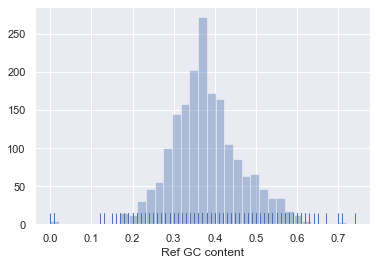

In [21]:
sns.distplot(gc, bins=35, kde=False, rug=True)
plt.xlabel("Ref GC content")
plt.show()

In [22]:
def make_data_array(wga_mu, no_wga_mu, gc, use_ratio, use_gc):
    data = []
    
    if use_ratio and use_gc:
        for no_wga_val, wga_val,gc_val in zip(no_wga_mu, wga_mu, gc):
            data.append([no_wga_val, wga_val, (wga_val + 1)/(no_wga_val + 1), gc_val])
    elif use_ratio:
        for no_wga, wga  in zip(no_wga_mu, wga_mu):
            data.append([no_wga, wga,  (wga + 1)/(no_wga + 1)])
    elif use_gc:
        
        for no_wga_val, wga_val , gc_val in zip(no_wga_mu, wga_mu,  gc):
            data.append([no_wga_val, wga_val, gc_val])
    else:
        
        for no_wga, wga  in zip(no_wga_mu, wga_mu):
            data.append([no_wga, wga ])
        
    return data

In [23]:
def kmeans_clustering(clusters, data, no_wga_mu, wga_mu):
    for nclusters in clusters:
    
        print("Number of clusters ", nclusters)
        kmeans = KMeans(n_clusters=nclusters)
        kmeans.fit(X=data)
        labels = kmeans.labels_
        centers = np.array(kmeans.cluster_centers_)

        calinski_harabasz_score = metrics.calinski_harabasz_score(data, labels)
        print("Calinski score: ", calinski_harabasz_score)
        davies_bouldin_score = metrics.davies_bouldin_score(data, labels)
        print("Davies score: ", davies_bouldin_score)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                          int(max(labels) + 1))))

        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])

        plt.scatter(no_wga_mu, wga_mu,  color=colors[labels])
        #plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
        plt.xlabel("NO-WGA ")
        plt.ylabel("WGA")
        plt.show()
    

In [24]:
def gmm_clustering(clusters, data, cov_type, tol,
                   max_itrs, n_init, no_wga_mu, wga_mu):
    
    for nclusters in clusters:
    
        print("Number of clusters ", nclusters)
        gmm = mixture.GaussianMixture(n_components=nclusters,
                                      covariance_type=cov_type,
                                      tol=tol, max_iter=max_itrs,
                                      n_init=n_init)
        gmm.fit(data)
        print("Converged: ", gmm.converged_)
        print("BIC: ", gmm.bic(data))
        labels = gmm.predict(data)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                          int(max(labels) + 1))))


        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])

        plt.scatter(no_wga_mu, wga_mu,  color=colors[labels])
        plt.xlabel("NO-WGA ")
        plt.ylabel("WGA")
        plt.show()
    

In [25]:
N_CLUSTERS = [2, 3, 4, 5]

## Two means 

In [26]:
data = make_data_array(wga_mu=wga_mu, 
                       no_wga_mu=no_wga_mu, gc=None, 
                       use_ratio=False, use_gc=False)

data = np.array(data)

assert data.shape == (len(wga_mu), 2)

### KMeans Clustering

Number of clusters  2
Calinski score:  1640.8179682763666
Davies score:  0.9534439741435625


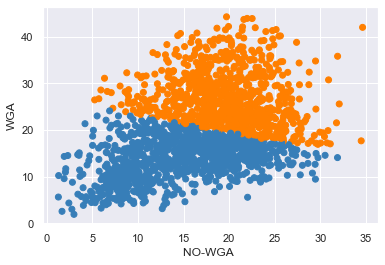

Number of clusters  3
Calinski score:  1875.6985013257386
Davies score:  0.8466796750649604


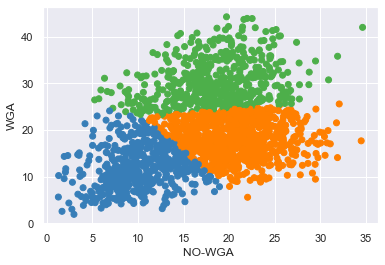

Number of clusters  4
Calinski score:  1795.5887723848882
Davies score:  0.8922601082715351


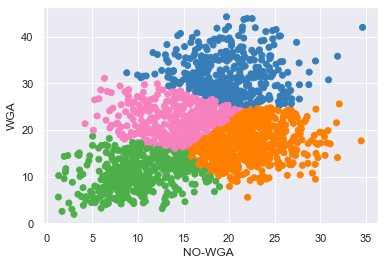

Number of clusters  5
Calinski score:  1785.7579347136682
Davies score:  0.8316632038701677


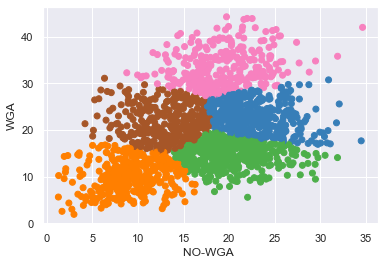

In [27]:
kmeans_clustering(clusters=N_CLUSTERS, data=data, no_wga_mu=no_wga_mu, wga_mu=wga_mu)


### GMM Clustering

### ```full```

Number of clusters  2
Converged:  True
BIC:  24479.553817568583


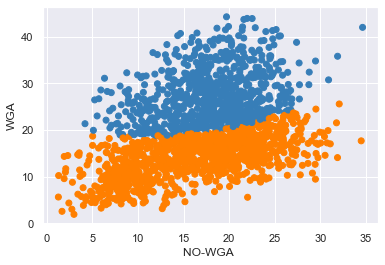

Number of clusters  3
Converged:  True
BIC:  24376.402856509343


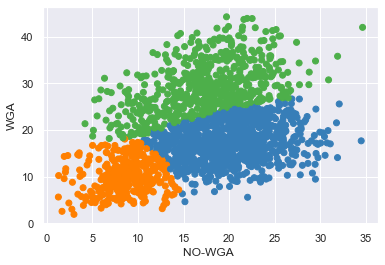

Number of clusters  4
Converged:  True
BIC:  24405.024261984647


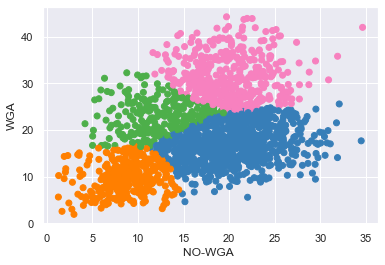

Number of clusters  5
Converged:  True
BIC:  24434.236355609835


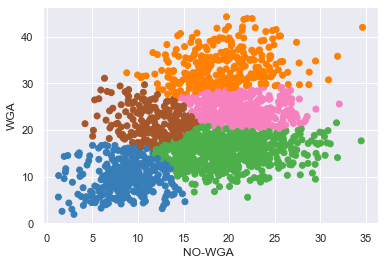

In [28]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='full',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)


### ```tied```

Number of clusters  2
Converged:  True
BIC:  24533.779477849403


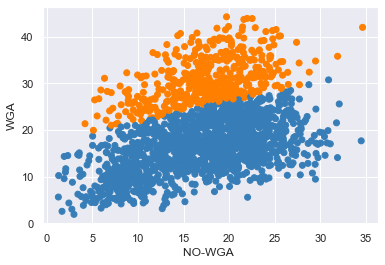

Number of clusters  3
Converged:  True
BIC:  24426.98967681847


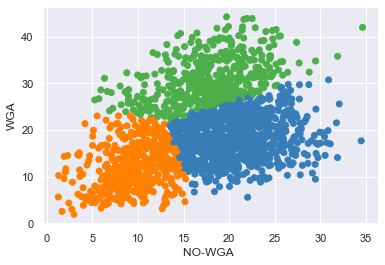

Number of clusters  4
Converged:  True
BIC:  24397.77496899411


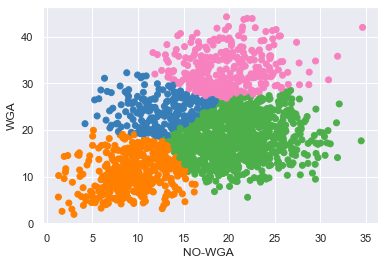

Number of clusters  5
Converged:  True
BIC:  24398.165802183077


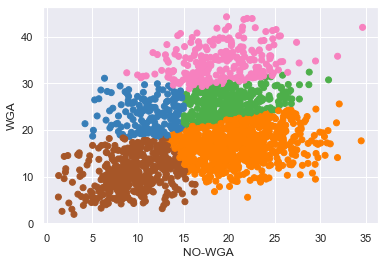

In [29]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, 
               cov_type='tied', max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### ```diag```

Number of clusters  2
Converged:  True
BIC:  24503.33430267715


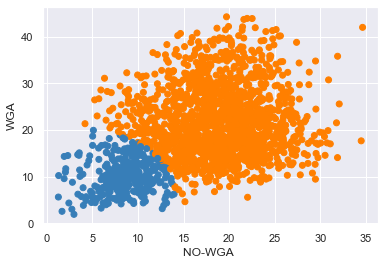

Number of clusters  3
Converged:  True
BIC:  24374.603421593234


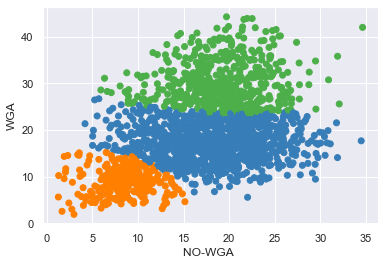

Number of clusters  4
Converged:  True
BIC:  24376.157052235423


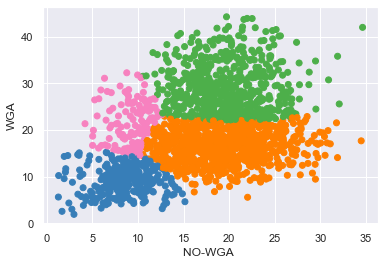

Number of clusters  5
Converged:  True
BIC:  24404.847307054588


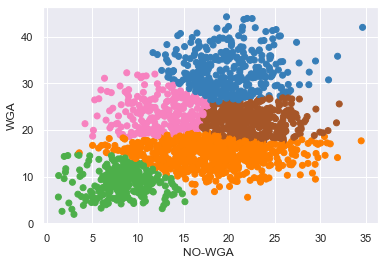

In [30]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='diag',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### ```spherical```

Number of clusters  2
Converged:  True
BIC:  24790.13296744253


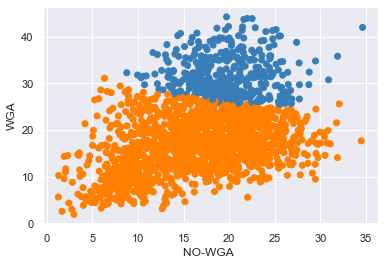

Number of clusters  3
Converged:  True
BIC:  24371.94598165639


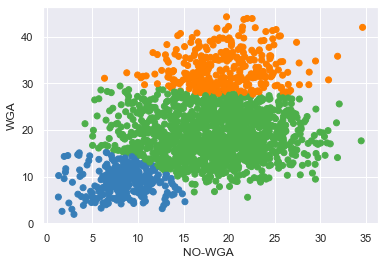

Number of clusters  4
Converged:  True
BIC:  24391.186834975146


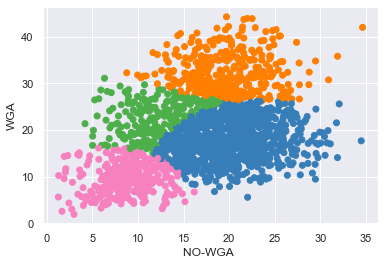

Number of clusters  5
Converged:  True
BIC:  24376.28597998805


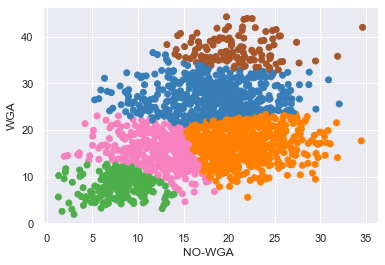

In [31]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='spherical',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

## Two means + Ratio

In [32]:



data = make_data_array(wga_mu=wga_mu, 
                       no_wga_mu=no_wga_mu, gc=None, 
                       use_ratio=True, use_gc=False)

data = np.array(data)

assert data.shape == (len(wga_mu), 3)

### KMeans

Number of clusters  2
Calinski score:  1633.035816525658
Davies score:  0.9553524988624236


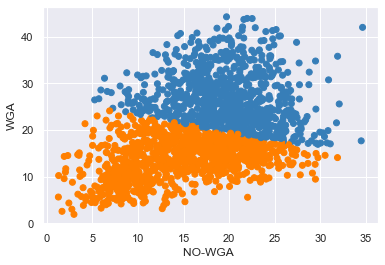

Number of clusters  3
Calinski score:  1866.2366715134597
Davies score:  0.8474619305263794


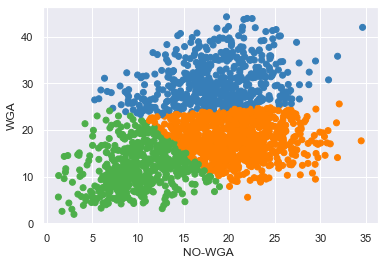

Number of clusters  4
Calinski score:  1784.307058826568
Davies score:  0.8938866458724635


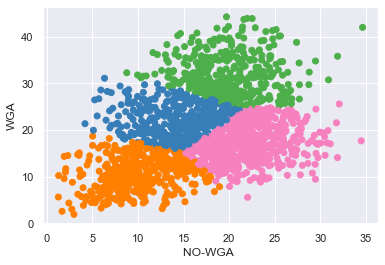

Number of clusters  5
Calinski score:  1771.8746362747918
Davies score:  0.8403410646084568


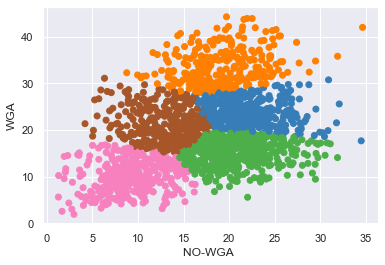

In [33]:
kmeans_clustering(clusters=N_CLUSTERS, data=data, no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### GMM

### ```full```

Number of clusters  2
Converged:  True
BIC:  21120.534324444165


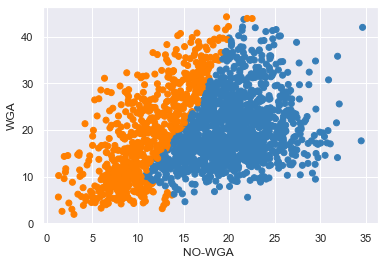

Number of clusters  3
Converged:  True
BIC:  19481.557914106434


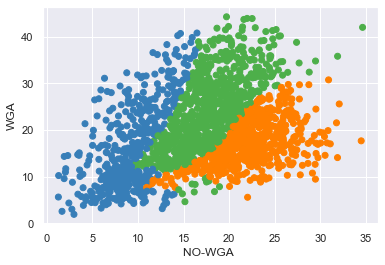

Number of clusters  4
Converged:  True
BIC:  18456.17683540828


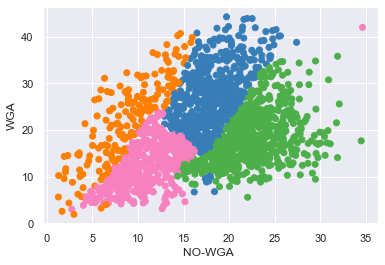

Number of clusters  5
Converged:  True
BIC:  17585.54904181707


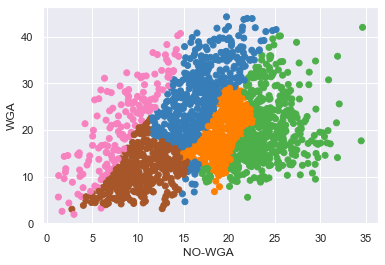

In [34]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='full',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### ```tied```

Number of clusters  2
Converged:  True
BIC:  24947.88397475214


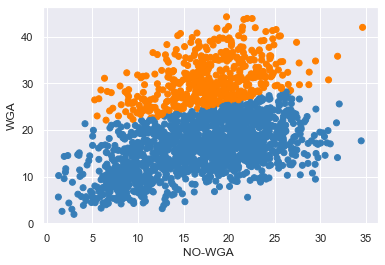

Number of clusters  3
Converged:  True
BIC:  24735.51522944721


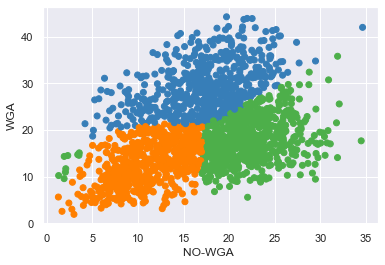

Number of clusters  4
Converged:  True
BIC:  24410.16127275817


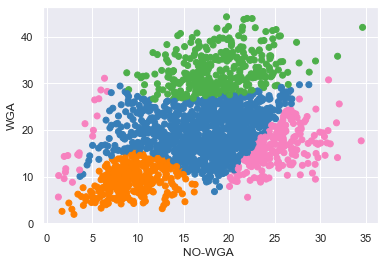

Number of clusters  5
Converged:  True
BIC:  23120.34484961229


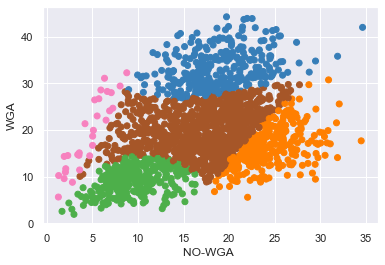

In [35]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-3, cov_type='tied',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### ```diag```

Number of clusters  2
Converged:  True
BIC:  26987.687438507015


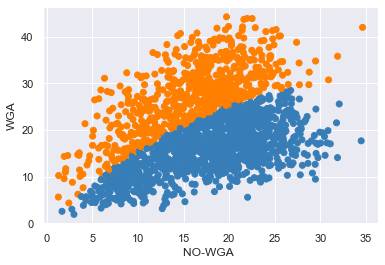

Number of clusters  3
Converged:  True
BIC:  26046.9510329608


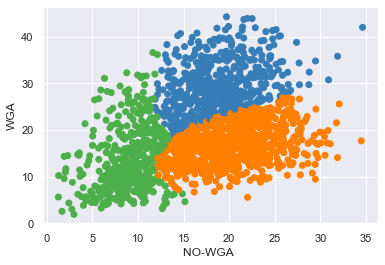

Number of clusters  4
Converged:  True
BIC:  25559.185128992576


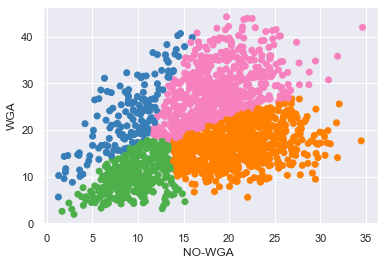

Number of clusters  5
Converged:  True
BIC:  25089.131962382486


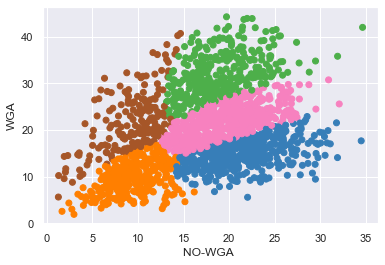

In [36]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='diag',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### ```spherical```

Number of clusters  2
Converged:  True
BIC:  34193.85768401534


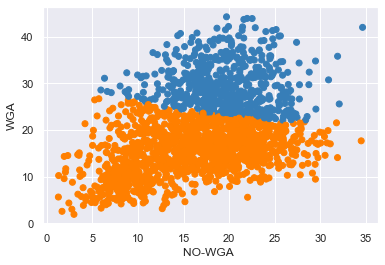

Number of clusters  3
Converged:  True
BIC:  32949.34343587423


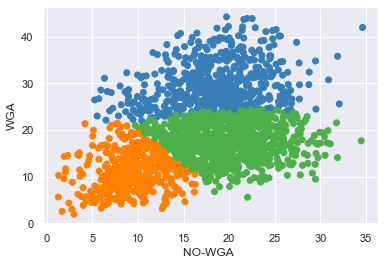

Number of clusters  4
Converged:  True
BIC:  32566.142969565102


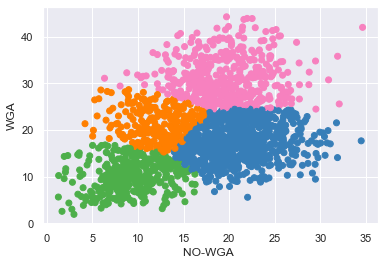

Number of clusters  5
Converged:  True
BIC:  32313.995467017303


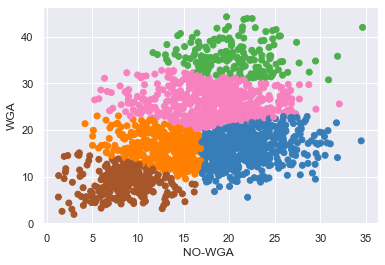

In [37]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='spherical',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)